In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

 # <h1 style='background:#F7B2B0; border:0; color:black'><center>FETAL HEALTH</center></h1> 

Cardiotocography (CTG) is used during pregnancy to monitor fetal heart rate and uterine contractions. It is monitor fetal well-being and allows early detection of fetal distress. 

 CTG interpretation helps in determining if the pregnancy is high or low risk.  An abnormal CTG may indicate the need for further investigations and potential intervention.

In this project, I will create a model to classify the outcome of Cardiotocogram test to ensure the well being of the fetus. 
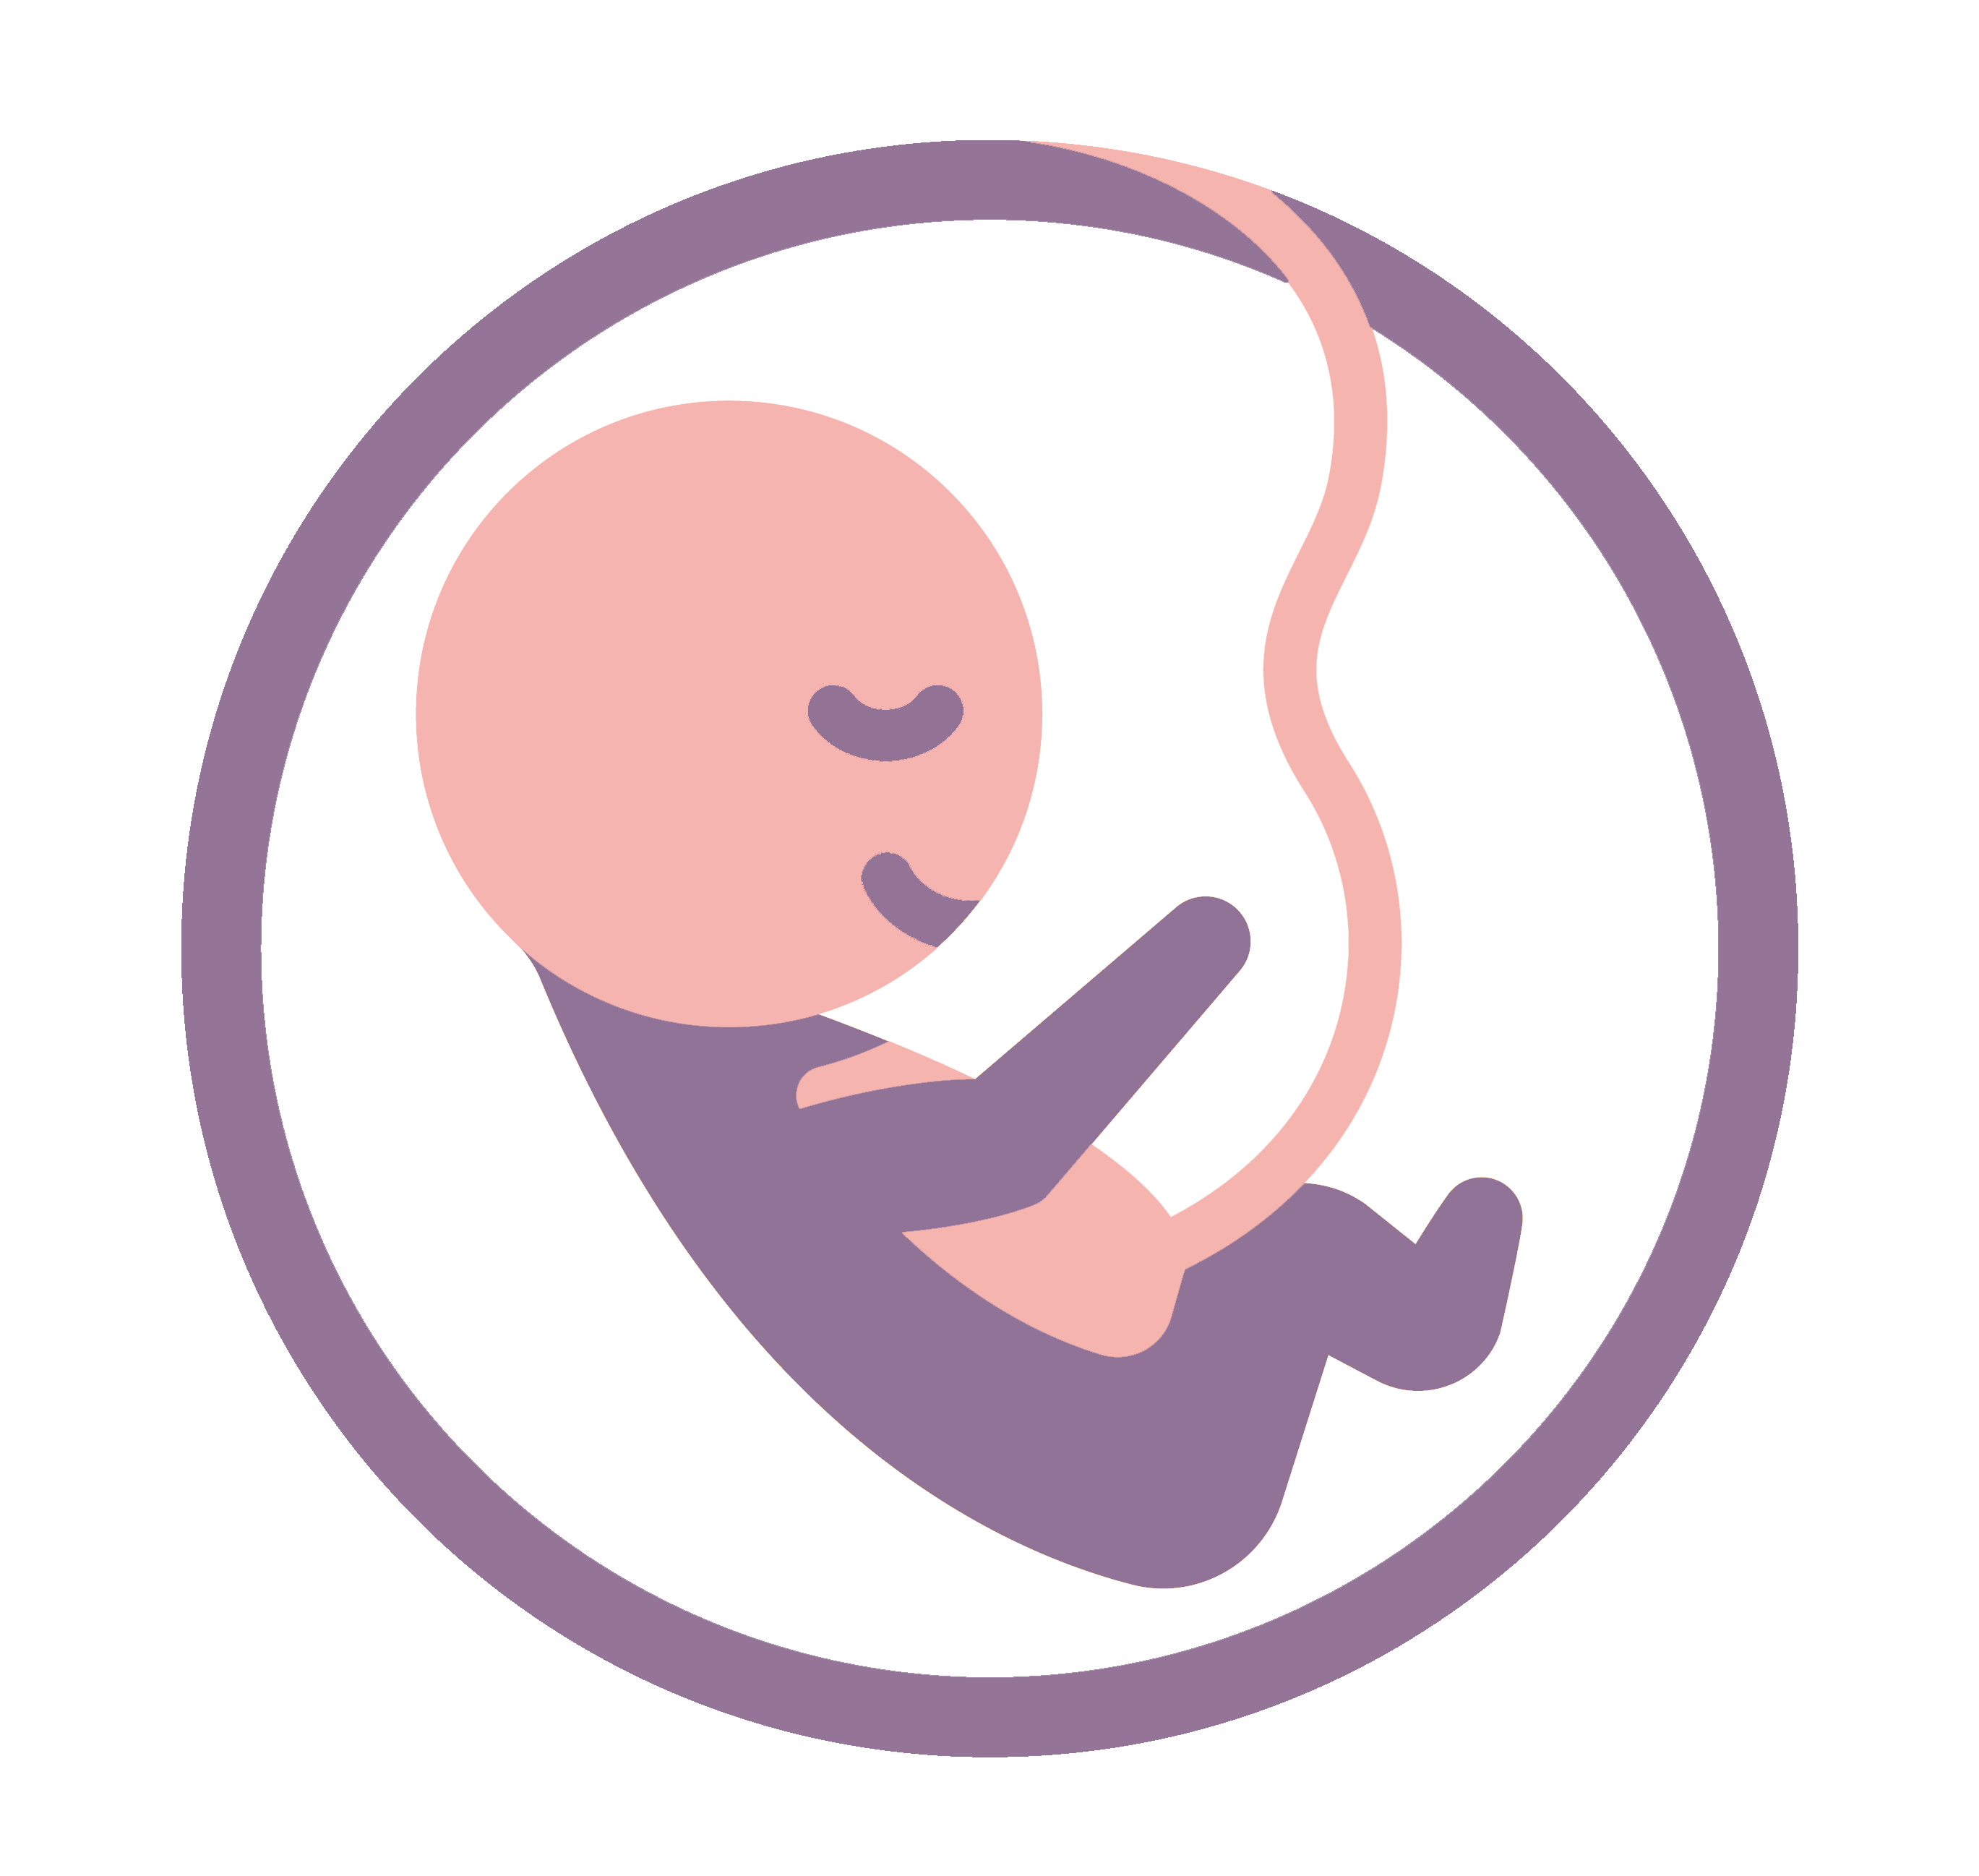

 # **<span style="color:#F7B2B0;">TABLE OF CONTENTS</span>**

**IMPORTING LIBRARIES**

**LOADING DATA**

**DATA PREPROCESSING**

**DATA ANALYSIS**

**MODEL BUILDING**

**CONCLUSIONS**

In [1]:
import pandas as pd

# Data to be saved in the CSV
data = {
    "Citation": [
        "Mandala, 2023", "Nagavibha et al., 2024", "Gaddam, Maheswari and Chennupalle, 2023",
        "Mehbodniya et al., 2021", "Noor, Ahmad and Noor, 2021"
    ],
    "Research Summary": [
        "This study evaluates the use of machine learning models to predict fetal health using CTG data, incorporating fetal heart rate, uterine contractions, and maternal blood pressure. The models applied include LightGBM, Random Forests, and TabNet, achieving high accuracies between 93% and 98.31%.",
        "This study emphasizes ML models for classifying fetal health using CTG data. Models such as Random Forests, Logistic Regression, Decision Trees, Support Vector Classifiers, Voting Classes, and K-Nearest Neighbours were used. Random Forest achieved the highest accuracy of 93%.",
        "The research investigates using machine learning models for fetal health classification, including ultrasound images. XGBoost and Random Forest were utilized, with Random Forest performing best for normal and suspect classes. The Random Forest model's predictions were interpreted using Explainable AI (XAI).",
        "This work focuses on the early identification of potential health risks for mothers and fetuses using machine learning to improve prenatal care. The study examines how ML can be used to predict fetal health and reduce mortality rates.",
        "This study uses supervised machine learning models to classify 2300 CTG exam records with 21 attributes. It compares classifiers such as K-NN, Linear SVM, Naive Bayes, Decision Tree, and Bayesian Networks. AdaBoost with Random Forest achieved the highest accuracy of 94.7%."
    ],
    "Used Machine Learning Models": [
        "LightGBM, Random Forests, TabNet", "Random Forest, Logistic Regression, Decision Trees, SVC, Voting Classifiers, K-NN",
        "XGBoost, Random Forest", "XGBoost, Random Forest, Decision Trees, SVM, Neural Networks",
        "K-NN, Linear SVM, Naive Bayes, Decision Tree, Bayesian Networks"
    ],
    "Best Accuracy Model's Name with Accuracy": [
        "LightGBM, Random Forests, TabNet (93% to 98.31%)", "Random Forest (93%)", "Random Forest (best precision for normal and suspect classes)",
        "Not provided", "AdaBoost with Random Forest (94.7%)"
    ]
}

# Creating a DataFrame from the data
df = pd.DataFrame(data)

# Saving the DataFrame as a CSV file
csv_file_path = 'fetal_health_ml_studies.csv'
df.to_csv(csv_file_path, index=False)

# Displaying the file path for the user to download
csv_file_path


'fetal_health_ml_studies.csv'

 # **<span style="color:#F7B2B0;">IMPORTING LIBRARIES</span>**

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

# **<span style="color:#F7B2B0;">LOADING DATA</span>**

In [4]:
data = pd.read_csv("fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


**On This Dataset**
**Cardiotocograms (CTGs)** are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes:

1. Normal
1. Suspect
1. Pathological

**Features**

* **'baseline value'** FHR baseline (beats per minute)
* **'accelerations'** Number of accelerations per second
* **'fetal_movement'** Number of fetal movements per second
* **'uterine_contractions'** Number of uterine contractions per second
* **'light_decelerations'** Number of light decelerations per second
* **'severe_decelerations'** Number of severe decelerations per second
* **'prolongued_decelerations'** Number of prolonged decelerations per second
* **'abnormal_short_term_variability'** Percentage of time with abnormal short term variability
* **'mean_value_of_short_term_variability'** Mean value of short term variability
* **'percentage_of_time_with_abnormal_long_term_variability'** Percentage of time with abnormal long term variability
* **'mean_value_of_long_term_variability'** Mean value of long term variability 
* **'histogram_width'** Width of FHR histogram
* **'histogram_min' Minimum** (low frequency) of FHR histogram
* **'histogram_max' Maximum** (high frequency) of FHR histogram
* **'histogram_number_of_peaks'** Number of histogram peaks
* **'histogram_number_of_zeroes'** Number of histogram zeros
* **'histogram_mode'** Histogram mode
* **'histogram_mean'** Histogram mean
* **'histogram_median'** Histogram median
* **'histogram_variance'** Histogram variance
* **'histogram_tendency'** Histogram tendency

* **Target**
* **'fetal_health'** Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

# **<span style="color:#F7B2B0;">DATA ANALYSIS</span>**

**The analysis consist of:**
* Count Plot
* Corelation Heat Map
* Implot
* Swarm And Boxen Plot

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16032\1306097861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= data, x="fetal_health",palette=colours)


<Axes: xlabel='fetal_health', ylabel='count'>

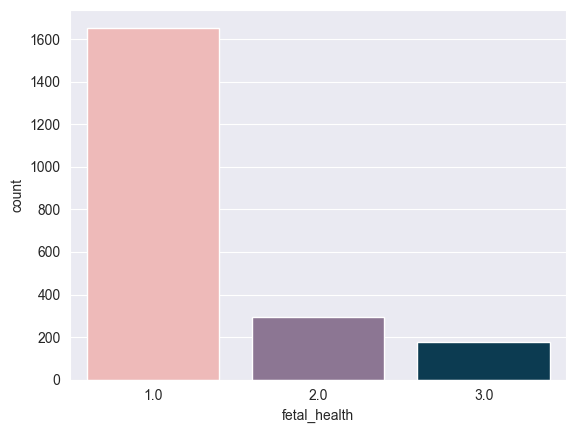

In [7]:
#First of all Let us evaluate the target and find out if our data is Imbalanced or not
colours=["#f7b2b0","#8f7198", "#003f5c"]
sns.countplot(data= data, x="fetal_health",palette=colours)

The count plot of targets indicates an imbalance in data. This is a case that tends to provide misleading classification accuracy. 

The performance measures that would provide better insight:
* Confusion Matrix
* Precision
* Recall
* F1 Score 

Let us evaluate the correlation matrix.

<Axes: >

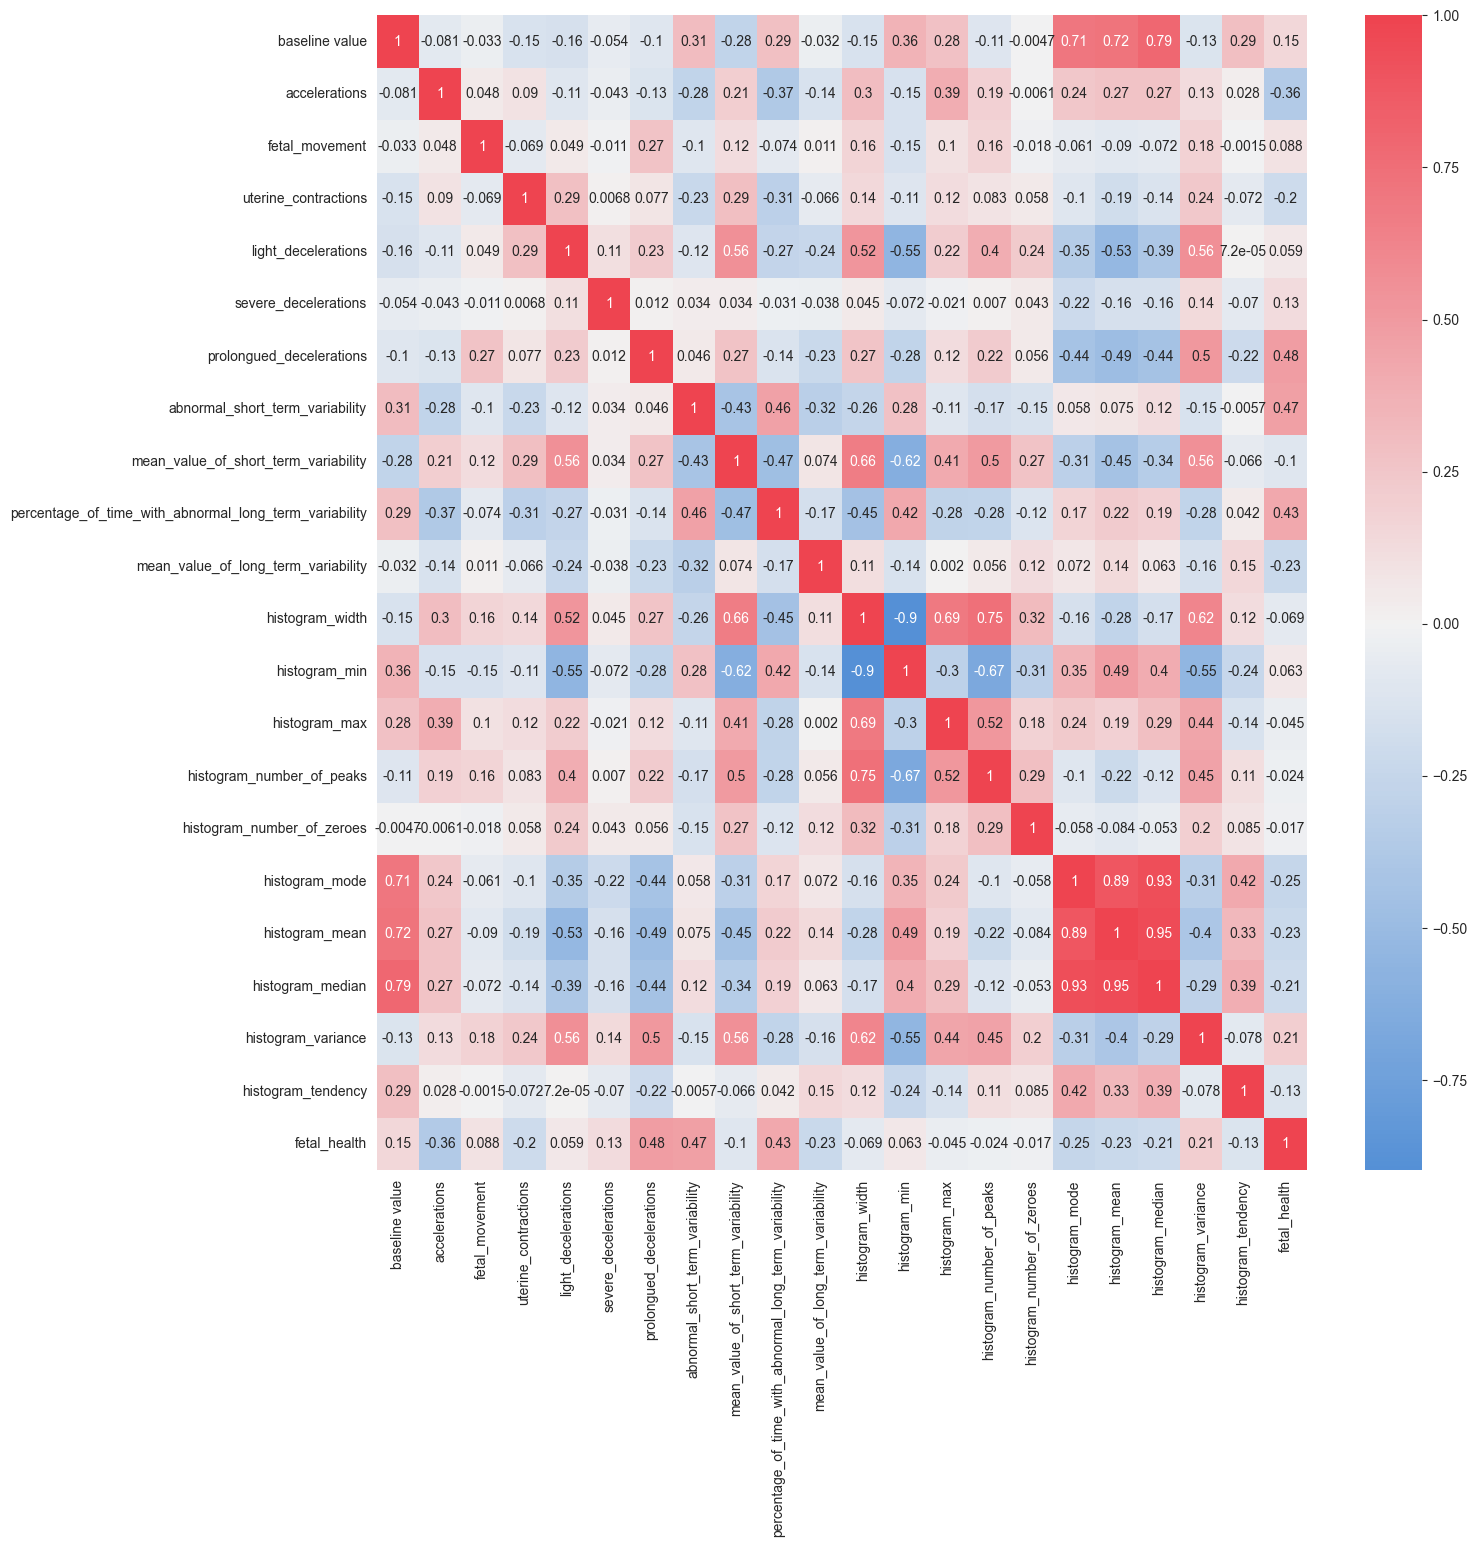

In [8]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Based on the correlation matix, it is clear that "accelerations","prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" and "mean_value_of_long_term_variability" are the features with higher correlation with fetal_health. Let's have a closer look at these with fetal_movement on y axis. This will provide a clearer picture of trends that indicate fetus health. 

**Accelerations Vs Fetal Movement by Fetal Health**

D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


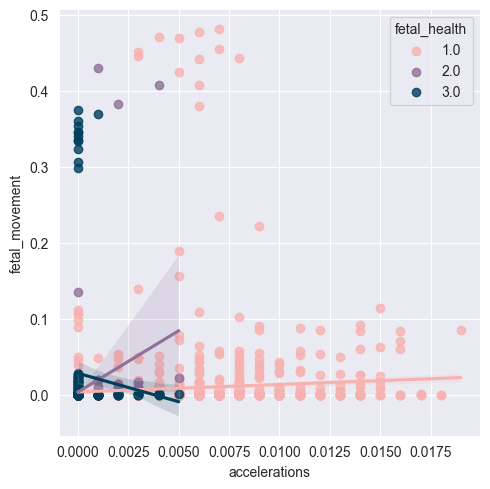

In [9]:
sns.lmplot(data =data,x="accelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

**Prolonged Decelerations Vs Fetal Movement by Fetal Health**

D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


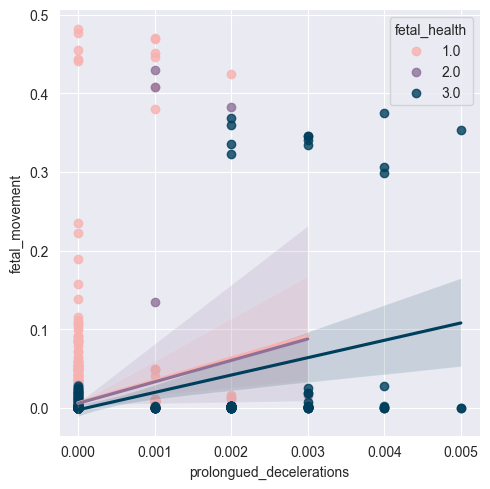

In [10]:
sns.lmplot(data =data,x="prolongued_decelerations",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

**Abnormal Short Term Variability Vs Fetal Movement by Fetal Health**

D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


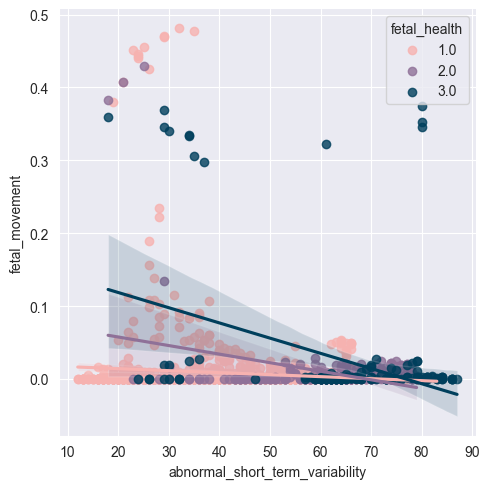

In [11]:
sns.lmplot(data =data,x="abnormal_short_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

**Mean Value Of Long Term Variability Vs Fetal Movement by Fetal Health**

D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


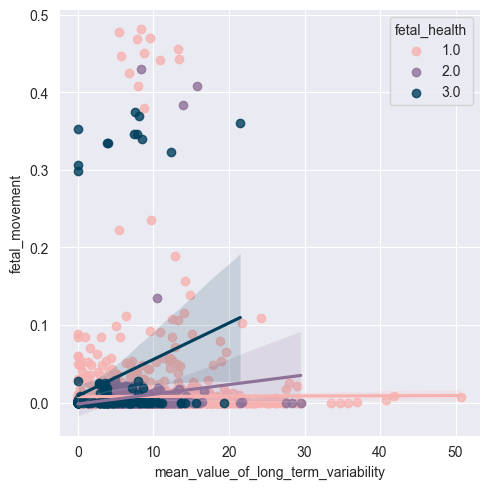

In [12]:
sns.lmplot(data =data,x="mean_value_of_long_term_variability",y="fetal_movement",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

We can see the rates of change of the above-mentioned values with each target show a specific trend. 
We can also spot outliers. Let's have a look at outliers on a more suitable plot.

In [13]:
# columns for detailed visualisation
cols=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']

In [ ]:
for i in cols:
    sns.swarmplot(x=data["fetal_health"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
    plt.show()

D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 49.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_40564\2270065525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 59.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers o

I spotted outliers on our dataset. However, it is not quite a good idea to remove them yet as it may lead to overfitting. Though we may end up with better statistics. 

A basic rule of thumb for the outliers in question is:

It is a measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation. In our case, this is the outcome of a CTG report so it is unlikely that this was a data entry error. 

If it is not a part of the population you are studying, you can legitimately remove the outlier. In this case, this all is about the fetus, and experts tag the classification. Let's stick with the expert opinion. 

Thus assuming that these are the natural part of the population we are studying, we should not remove it.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16032\1775805333.py:3: UserWarning: 
The palette list has fewer values (5) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = data,palette = shades)


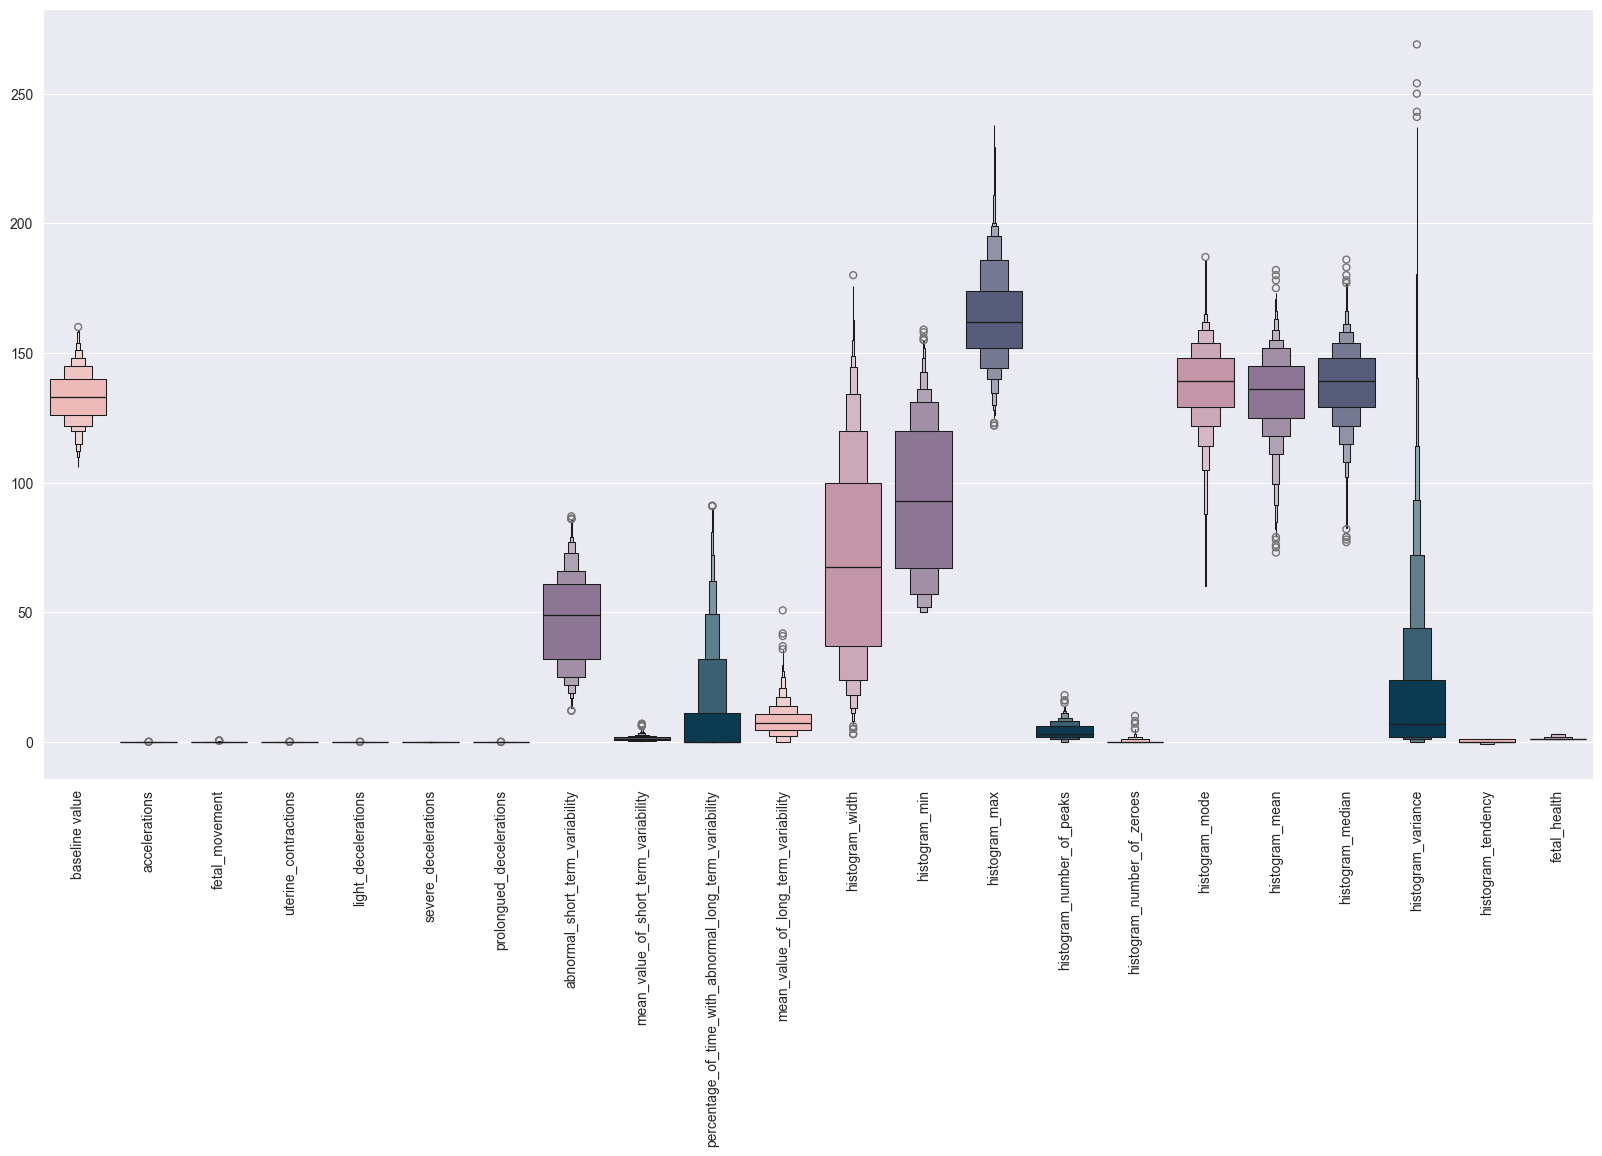

In [14]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = data,palette = shades)
plt.xticks(rotation=90)
plt.show()

The above plot shows the range of our feature attributes. All the features are in different ranges. To fit this in a model we must scale it to the same range.

In the model building, we will preprocess the features to do the same.

# **<span style="color:#F7B2B0;">MODEL SELECTION AND BUILDING</span>**
In this section we will:
* Set up features(X) and target(Y)
* Scale the features
* Split training and test sets 
* Model selection
* Hyperparameter tuning

In [15]:
#assigning values to features as X and target as y
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16032\1574493845.py:3: UserWarning: 
The palette list has fewer values (5) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = X_df,palette = shades)


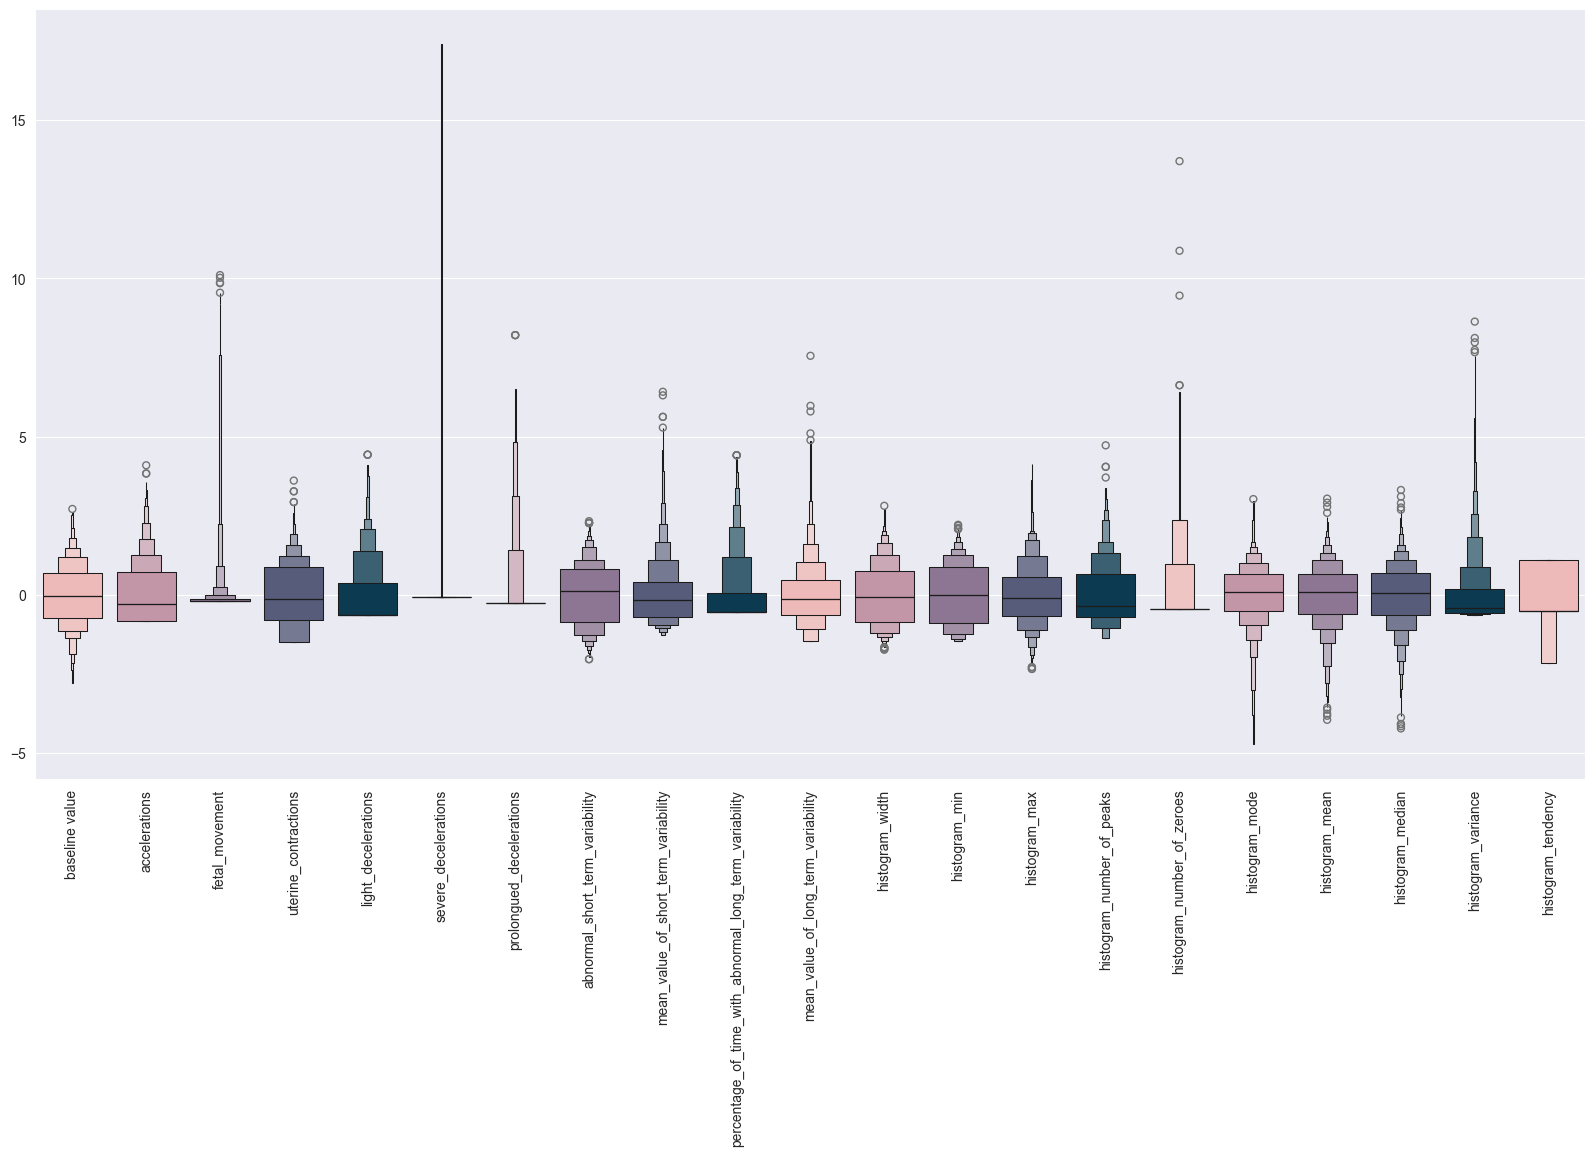

In [16]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [17]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [18]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.897170 
Decision Tree: 0.916683 
RandomForest: 0.940205 
SVC: 0.906594 


So Random Forest does best amongst the models to be the most accurate. Let us build a better random forest with grid search cv.
Let's find out how it performs on testset

In [19]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.9435736677115988


In [20]:
#Building a dictionary with list of optional values that will me analyzed by GridSearch CV
parameters = { 
    'n_estimators': [100,150, 200,500,700,900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,12,14,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

#Fitting the Training to find parameters with best accuracy
CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch
CV_rfc.best_params_

D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\Data Engineering Project\ML Project\aiwork\lib\site-packages\sklearn\base.py", line 666, in _validate_para

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'log2',
 'n_estimators': 150,
 'n_jobs': None}

In [21]:
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.9482758620689655

In [22]:
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* Random Forest Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Results *********
Accuracy    :  0.9482758620689655
Recall      :  0.9482758620689655
Precision   :  0.9473502866858087
F1 Score    :  0.9482758620689655


In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       496
         2.0       0.91      0.79      0.85       101
         3.0       0.90      0.93      0.92        41

    accuracy                           0.95       638
   macro avg       0.92      0.90      0.91       638
weighted avg       0.95      0.95      0.95       638



<Axes: >

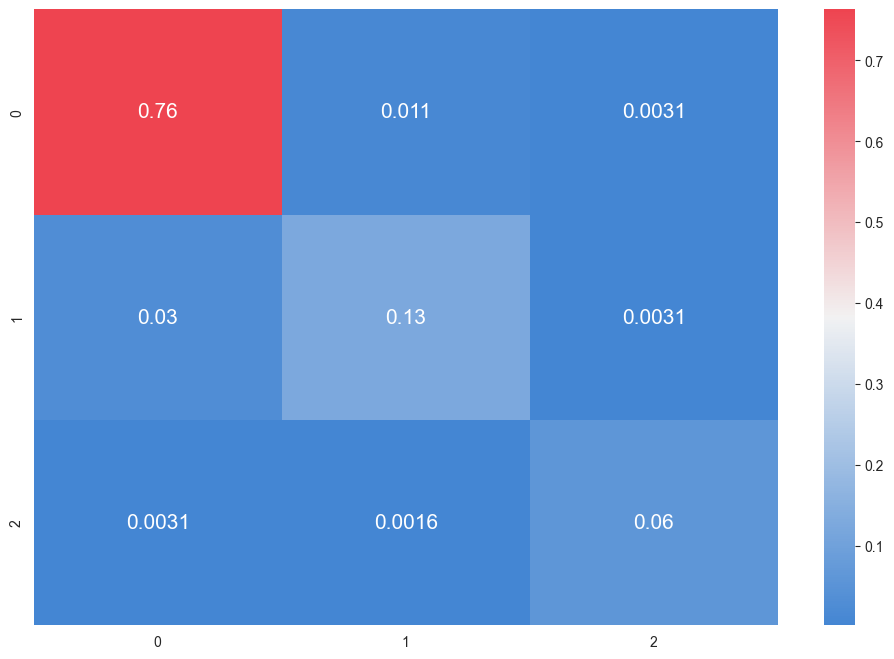

In [25]:
# Confusion Matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

<a id="5"></a>
# <h1 style='background:#f7b2b0; border:0; color:black'><center>END</center></h1>